In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense ,Bidirectional

from datetime import datetime

In [2]:

# Download data for the last 5 years till October 2024
ticker = 'AAPL'
today = datetime.today().strftime('%Y-%m-%d')
data = yf.download(ticker, start='2019-01-01', end='2024-10-31')['Close']


[*********************100%***********************]  1 of 1 completed


In [3]:

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))


In [4]:

# Prepare sequences for LSTM model
look_back = 60  # Using 60 days as the look-back period
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)


In [5]:

# Split into train and test data (80% for training, 20% for testing)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [6]:

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)




In [9]:

# Build LSTM model with increased complexity
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))


c:\Users\Divya Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 485ms/step - loss: 0.0632 - val_loss: 0.0014
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - loss: 0.0050 - val_loss: 9.9515e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0027 - val_loss: 8.8391e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - loss: 0.0016 - val_loss: 8.6288e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - loss: 0.0014 - val_loss: 9.6764e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - loss: 0.0014 - val_loss: 7.1763e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 0.0013 - val_loss: 8.9861e-04
Epoch 12/100
18

In [11]:

# Forecast the next 20 days (for December 2024)
def forecast(model, data, steps=20):
    inputs = data[-look_back:].reshape(1, -1, 1)
    predictions = []
    for _ in range(steps):
        pred = model.predict(inputs)
        predictions.append(pred[0, 0])
        inputs = np.append(inputs[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


In [12]:

# Forecast for the next 20 days
forecasted_20_days = forecast(model, data_scaled, steps=20)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [13]:

# Prepare actual data for the forecasted period (for comparison)
actual_december_data = yf.download(ticker, start='2024-12-01', end='2024-12-20')['Close'].values
actual_december_data_scaled = scaler.transform(actual_december_data.reshape(-1, 1))


[*********************100%***********************]  1 of 1 completed


In [14]:

# Ensure forecasted data and actual data have the same length
forecasted_20_days = forecasted_20_days.flatten()  # Flatten forecasted data to make it 1D
forecasted_20_days = forecasted_20_days[:len(actual_december_data)]  # Slice forecasted data to match actual data length


In [15]:

# Calculate RMSE (Root Mean Squared Error) between forecasted and actual values
rmse = np.sqrt(mean_squared_error(actual_december_data, forecasted_20_days))

# Calculate accuracy as percentage
accuracy = (1 - (rmse / np.mean(actual_december_data))) * 100

# Print RMSE and accuracy
print(f"RMSE: {rmse:.2f}")
print(f"Accuracy: {accuracy:.2f}%")


RMSE: 16.03
Accuracy: 93.50%


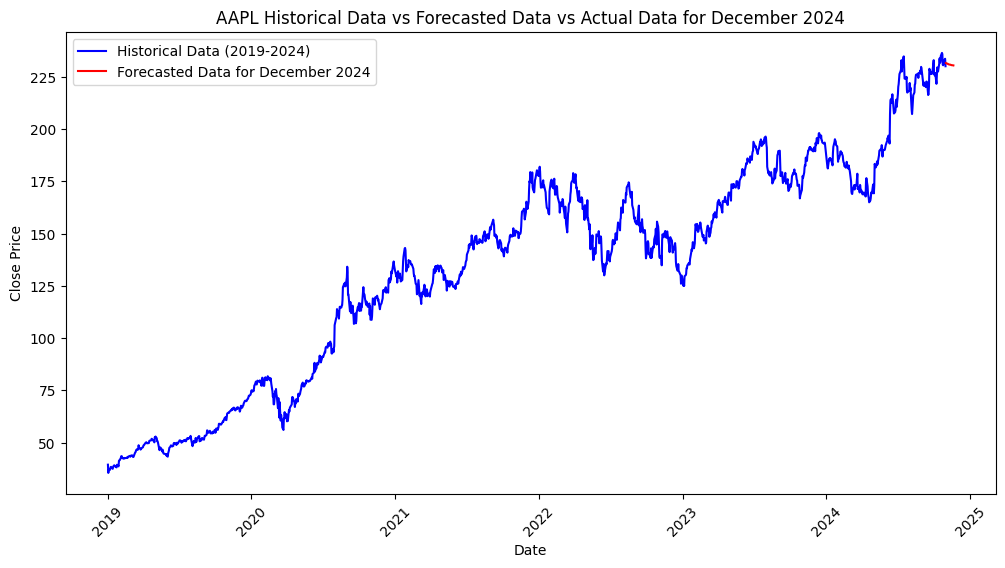

In [16]:

# Create dates for plotting
historical_dates = data.index
forecasted_dates = pd.date_range(start=historical_dates[-1], periods=len(forecasted_20_days)+1, freq='B')[1:]
actual_dates = pd.date_range(start='2024-12-01', end='2024-12-20', freq='B')

# Plot historical data, forecasted data, and actual data
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, data, label='Historical Data (2019-2024)', color='blue')
plt.plot(forecasted_dates, forecasted_20_days, label='Forecasted Data for December 2024', color='red')
#plt.plot(actual_dates, actual_december_data, label='Actual Data for December 2024', color='green')
plt.title(f'{ticker} Historical Data vs Forecasted Data vs Actual Data for December 2024')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
